# Preprocessing the Data

This notebook preprocesses the data taken from: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding 

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read_data
df = pd.read_csv("kiva_loans.csv//kiva_loans.csv")
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
# drop unwanted features
df.drop(['id', 
         'funded_amount', 
         'activity', 
         'use', 
         'country', 
         'region', 
         'partner_id', 
         'posted_time', 
         'disbursed_time', 
         'funded_time', 
         'term_in_months', 
         'lender_count', 
         'tags', 
         'repayment_interval', 
         'date'], axis=1, inplace=True)
df.head()

,loan_amount,sector,country_code,currency,borrower_genders
0,300.0,Food,PK,PKR,female
1,575.0,Transportation,PK,PKR,"female, female"
2,150.0,Transportation,IN,INR,female
3,200.0,Arts,PK,PKR,female
4,400.0,Food,PK,PKR,female


In [5]:
# select data from India 
df_in = df[df['country_code'] == 'IN']
df_in

,loan_amount,sector,country_code,currency,borrower_genders
2,150.0,Transportation,IN,INR,female
6,200.0,Agriculture,IN,INR,female
14,225.0,Agriculture,IN,INR,female
18,250.0,Services,IN,INR,female
25,250.0,Agriculture,IN,INR,female
...,...,...,...,...,...
664994,325.0,Housing,IN,INR,female
665080,325.0,Housing,IN,INR,female
665099,325.0,Housing,IN,INR,female
665231,250.0,Agriculture,IN,INR,female


In [6]:
# Number of null values
df_in.isna().sum()

loan_amount          0
sector               0
country_code         0
currency             0
borrower_genders    43
dtype: int64

In [7]:
# drop country code column
df_in.drop('country_code', axis=1, inplace=True)
df_in.head()

,loan_amount,sector,currency,borrower_genders
2,150.0,Transportation,INR,female
6,200.0,Agriculture,INR,female
14,225.0,Agriculture,INR,female
18,250.0,Services,INR,female
25,250.0,Agriculture,INR,female


In [8]:
# collect sectors for one-hot encoding
sectors = set(df_in['sector'].values)
print(sectors)

{'Services', 'Clothing', 'Transportation', 'Personal Use', 'Retail', 'Health', 'Food', 'Education', 'Manufacturing', 'Wholesale', 'Construction', 'Arts', 'Agriculture', 'Entertainment', 'Housing'}


In [9]:
# keep rows where the currency is INR
df_in = df_in[df_in['currency'] == 'INR']
df_in.head()

,loan_amount,sector,currency,borrower_genders
2,150.0,Transportation,INR,female
6,200.0,Agriculture,INR,female
14,225.0,Agriculture,INR,female
18,250.0,Services,INR,female
25,250.0,Agriculture,INR,female


In [10]:
# One-hot encode sectors
for col in sectors:
    df_in[col] = (df['sector'] == col).astype(int)

# One-hot encode genders
for sex in ['male', 'female']:
    df_in[sex] = (df['borrower_genders'] == sex).astype(int)
    
df_in.head()

,loan_amount,sector,currency,borrower_genders,Services,Clothing,Transportation,Personal Use,Retail,Health,...,Education,Manufacturing,Wholesale,Construction,Arts,Agriculture,Entertainment,Housing,male,female
2,150.0,Transportation,INR,female,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,200.0,Agriculture,INR,female,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
14,225.0,Agriculture,INR,female,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
18,250.0,Services,INR,female,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25,250.0,Agriculture,INR,female,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
df_in.drop(['sector', 'currency', 'borrower_genders'], axis=1, inplace=True)
df_in.head()

,loan_amount,Services,Clothing,Transportation,Personal Use,Retail,Health,Food,Education,Manufacturing,Wholesale,Construction,Arts,Agriculture,Entertainment,Housing,male,female
2,150.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,200.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
14,225.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
18,250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25,250.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [12]:
# dataframe stats
df_in.describe()

,loan_amount,Services,Clothing,Transportation,Personal Use,Retail,Health,Food,Education,Manufacturing,Wholesale,Construction,Arts,Agriculture,Entertainment,Housing,male,female
count,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000,11221.000000
mean,596.617948,0.093842,0.046698,0.015328,0.028072,0.061937,0.003832,0.173247,0.049906,0.025755,0.000356,0.011675,0.069067,0.304429,0.000446,0.115409,0.016576,0.673469
std,736.406847,0.291622,0.211001,0.122861,0.165187,0.241053,0.061788,0.378477,0.217761,0.158411,0.018878,0.107421,0.253579,0.460186,0.021105,0.319529,0.127682,0.468965
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,325.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,12925.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Loan Distribution')

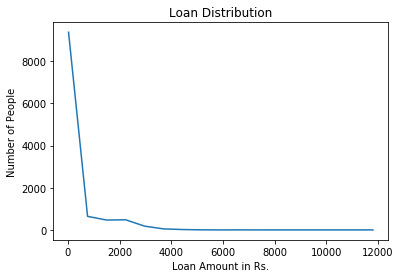

In [13]:
# Plot loan distribution
loan_freq = [(df_in['loan_amount'].apply(lambda x: i <= x < i + 736)).sum() for i in range(25, 12200, 736)]
x_axis = [i for i in range(25, 12200, 736)]
plt.plot(x_axis, loan_freq)
plt.xlabel('Loan Amount in Rs.')
plt.ylabel('Number of People')
plt.title('Loan Distribution')

In [14]:
# # Min-max normalisation of loan_amount
# df_in.loan_amount = (df_in.loan_amount - df_in.loan_amount.min())/(df_in.loan_amount.max() - df_in.loan_amount.min())
# df_in.head()

In [15]:
df_in.sum()

loan_amount       6694650.0
Services             1053.0
Clothing              524.0
Transportation        172.0
Personal Use          315.0
Retail                695.0
Health                 43.0
Food                 1944.0
Education             560.0
Manufacturing         289.0
Wholesale               4.0
Construction          131.0
Arts                  775.0
Agriculture          3416.0
Entertainment           5.0
Housing              1295.0
male                  186.0
female               7557.0
dtype: float64

In [16]:
# save the preprocessed data
df_in.to_csv("kiva_loans.csv//recep_data.csv", index=False)